In [3]:
import torch
import numpy as np

from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F

x = Variable(torch.Tensor([1.1]), requires_grad=True)
y = Variable(torch.Tensor([2.1]), requires_grad=True)
z = 2*x+y

z.backward(torch.Tensor([1.0]))

print type(x.grad.data)
print type(y.grad)
print x.grad.data
print y.grad


<class 'torch.FloatTensor'>
<class 'torch.autograd.variable.Variable'>

 2
[torch.FloatTensor of size 1]

Variable containing:
 1
[torch.FloatTensor of size 1]



In [4]:
a = torch.Tensor([[1,2],[3,4]])
b = torch.Tensor([[1,1],[1,1]])
print a.matmul(b)


 3  3
 7  7
[torch.FloatTensor of size 2x2]



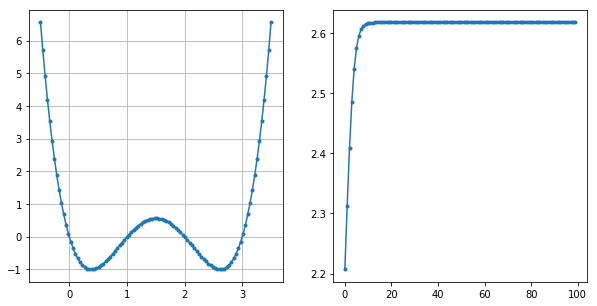

In [5]:
'''gradient descent demo'''

import torch.autograd as autograd
import matplotlib.pyplot as plt

#%matplotlib notebook
%matplotlib inline

#import mpld3
#mpld3.enable_notebook()

x = autograd.Variable(torch.Tensor([2.1]), requires_grad=True)

rate = 0.05

l = []
n = 100
for i in xrange(n):
    y = (x-1)*(x-2)*(x-3)*x
    y.backward()
    x.data = x.data - x.grad.data * rate
    l.append( float(x.data.numpy()) )

    x.grad.data.zero_()

plt.figure(figsize=[10,5])
plt.subplot(121)
x = np.linspace(-0.5,3.5,100)
y = (x-1)*(x-2)*(x-3)*x
plt.plot(x, y, '.-')
plt.grid()

plt.subplot(122)
plt.plot(range(n), l, '.-')
plt.show()


In [6]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1,6,5)# 1x6 x 5x5
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, (2,2))
        
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, (2,2))
        
        x = x.view(-1, self.num_flat_features(x))
        
        x = self.fc1(x)
        x = F.relu(x)
        
        x = self.fc2(x)
        x = F.relu(x)
        
        x = self.fc3(x)
        return x
    
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_reatures = 1
        for s in size:
            num_reatures *= s
        return num_reatures
    
net = Net()
print [i.size() for i in net.parameters()]


[torch.Size([6, 1, 5, 5]), torch.Size([6]), torch.Size([16, 6, 5, 5]), torch.Size([16]), torch.Size([120, 400]), torch.Size([120]), torch.Size([84, 120]), torch.Size([84]), torch.Size([10, 84]), torch.Size([10])]


In [7]:
x = Variable(torch.randn(1,1,32,32), requires_grad=True)
y = net(x)
print y

#plt.imshow(x.data[0,0,:,:].numpy())
#plt.imshow(y.data.numpy())
#plt.show()

net.zero_grad()
y.backward(torch.ones(1,10))
#print list(net.parameters())[0].grad[0,0,:,:]
net.zero_grad()
#print list(net.parameters())[0].grad[0,0,:,:]

x.grad.data.zero_()
#print x.grad[0,0,:,:]

Variable containing:
 0.0520 -0.1056 -0.1166  0.0368  0.1084  0.0332  0.0812 -0.1020 -0.0697  0.0795
[torch.FloatTensor of size 1x10]




(0 ,0 ,.,.) = 
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
     ...       ⋱       ...    
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
[torch.FloatTensor of size 1x1x32x32]

In [11]:
x = Variable(torch.randn(1,1,32,32), requires_grad=True)
y = net(x)

y_ = Variable(torch.zeros(1,10))
mse = nn.MSELoss()

loss = mse(y, y_)
#print loss.grad_fn.next_functions[0][0]

net.zero_grad()
#print net.conv1.bias.grad
loss.backward()
#print net.conv1.bias.grad

#manually update weights
rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * rate)
    

In [9]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.01)
optimizer.zero_grad()
y = net(x)
loss = mse(y, y_)
loss.backward()
optimizer.step()

In [14]:
x

Variable containing:
(0 ,0 ,.,.) = 
  1.0254  1.3179 -0.7910  ...   0.2948  0.1722 -1.4492
  0.8577  0.6890  1.3981  ...   1.7602 -0.1928  0.6099
  1.9167 -0.3214  1.8053  ...  -1.5619  1.9129  1.5047
           ...             ⋱             ...          
 -0.6602  1.0985 -0.2746  ...  -1.8150 -0.1195 -0.8950
 -1.3051 -0.8002 -0.6616  ...  -1.2970  1.8517  1.0502
  0.2892  0.4739  0.7683  ...  -0.4165  2.0016 -0.8958
[torch.FloatTensor of size 1x1x32x32]